In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv('/content/drive/MyDrive/datasets/the-hello-dataset-fa22.csv')

## **Cleaning**

In [148]:
# Cleaning name
df.Name = df.Name.str.strip()
df.Name = df.Name.str.title()

In [149]:
# Cleaning gender
df.Gender = df.Gender.str.strip()
df.Gender = df.Gender.str.title()

In [150]:
# Cleaning HSSC-1
df['HSSC-1'] = df['HSSC-1'].str.extract(r'(\d{3})')
# If marks are more than 550, then considering marks entered from 1100 and downgrading keeping the ratio
df.loc[df['HSSC-1'].astype(float) >= 550, 'HSSC-1'] = 550 * (df['HSSC-1'].astype(float) / 1100 )

In [151]:
# Cleaning HSSC-2
df['HSSC-2'] = df['HSSC-2'].str.extract(r'(\d{3})')
# If marks are more than 550, then considering marks entered from 1100 and downgrading keeping the ratio
df.loc[df['HSSC-2'].astype(float) >= 550, 'HSSC-2'] = 550 * (df['HSSC-2'].astype(float) / 1100 )

In [152]:
# Cleaning CGPA
df.CGPA = df.CGPA.str.extract(r'(\d\.?\d{0,2})')

In [153]:
# Cleaning Favorite Color
df.FavoriteColor = df.FavoriteColor.str.strip()
df.FavoriteColor = df.FavoriteColor.str.title()

In [159]:
# Cleaning Birth month
df.BirthMonth = df.BirthMonth.str.strip()
df.BirthMonth = df.BirthMonth.str.title()
df.BirthMonth = df.BirthMonth.str.replace('11', 'November')
df.BirthMonth = df.BirthMonth.str.replace('24/02/2001', 'February')
df.BirthMonth = df.BirthMonth.str.replace(r'^Sep$', 'September')
df.BirthMonth = df.BirthMonth.str.replace('Feburary', 'February')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [157]:
# Cleaning Weight
df.Weight = df.Weight.str.extract(r'(\d{1,3}\.?\d?)')

## **Questions**

In [160]:
# Print the list of all students whose first name starts with letter the 'H'.
df[df.Name.str[0] == 'H'].Name

9             Hamza Naveed
21             Habib Ullah
22            Hunain Javed
58    Hafiz Malahim Labib.
60     Hamna Tariq Saleemi
77                    Hina
78        Hamza Javed Khan
80           Husnain Ahmed
93        Hamayoun Masroor
98           Hussain Afzal
Name: Name, dtype: object

In [161]:
# Print the total number of students who have a three words name (first-middle-surname).
len(df[df.Name.str.match(r'^([a-zA-z]+ ){2}[a-zA-z]+$')])


35

In [162]:
# Print the percentage of students who have a CGPA of 3.0 or above.
(len(df[df.CGPA.astype(float) >= 3]) / len(df)) * 100

28.35820895522388

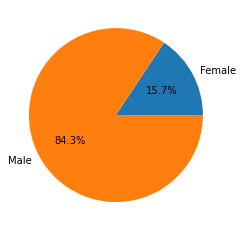

In [163]:
# Plot a pie chart to show the ratio of male and female students.
plt.pie(df.groupby(['Gender']).size(), labels = ['Female', 'Male'], autopct='%1.1f%%')
plt.show()

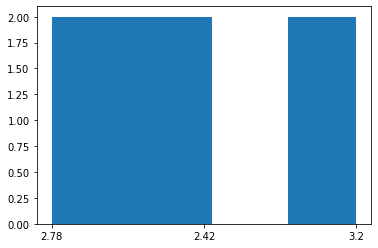

In [164]:
# Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0.
maleStudents = df[df["Gender"]=="Male"]

plt.hist(x = maleStudents.CGPA,bins=[2,2.55,3.05,3.55,4])
plt.show()

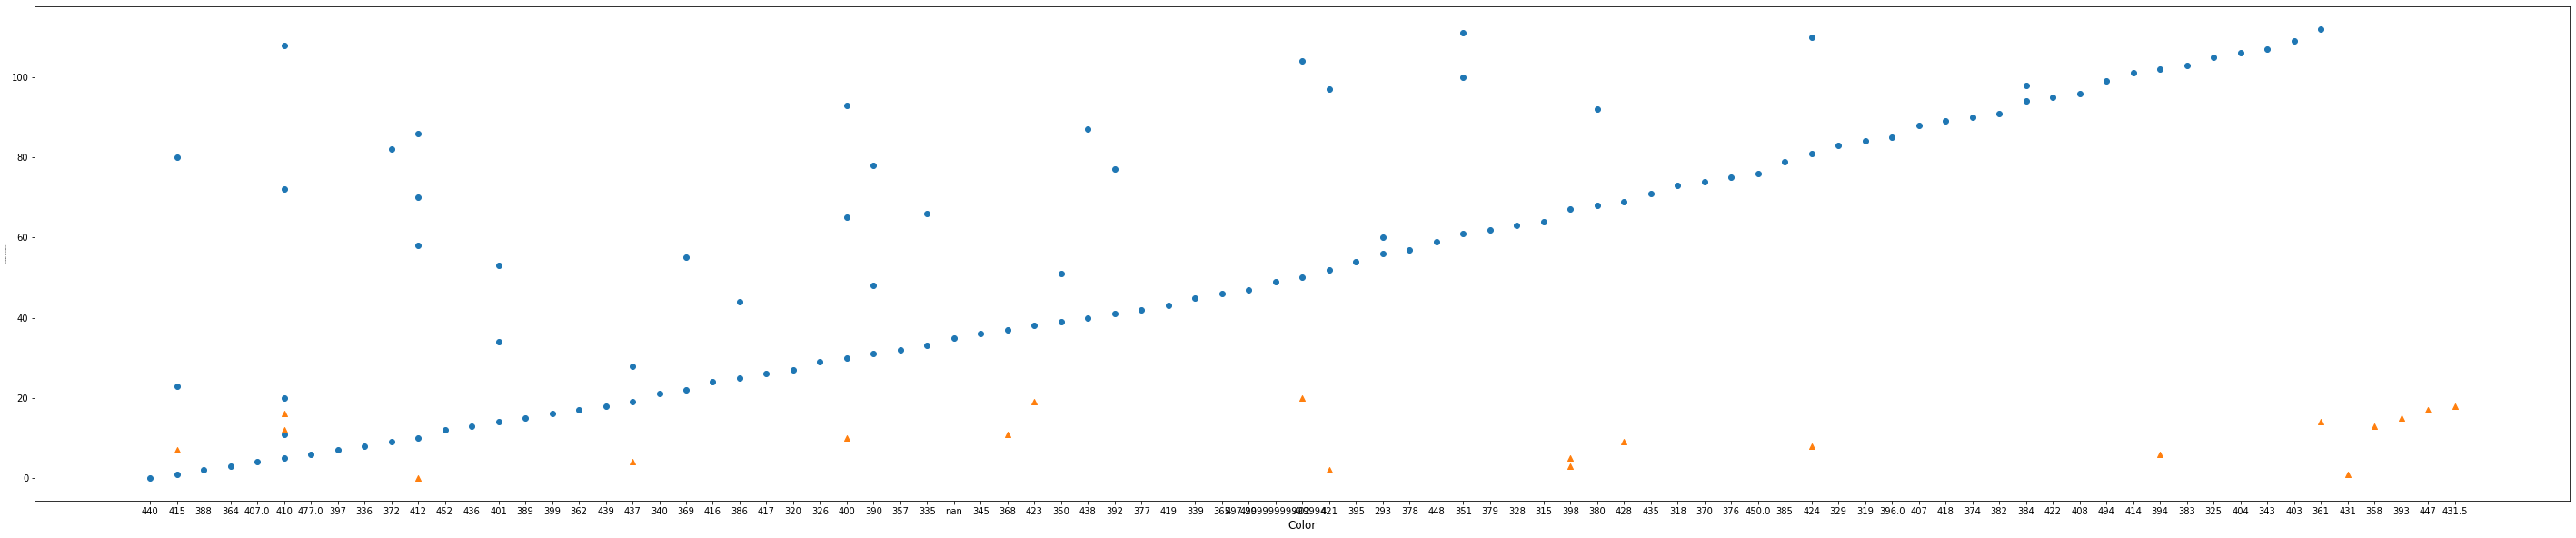

In [165]:
# Plot the HSSC-1 marks of all male vs female students on a scatter plot.
maleStudents = (df[df["Gender"]=="Male"])['HSSC-1'].astype(str)
femaleStudents= (df[df["Gender"]=="Female"])['HSSC-1'].astype(str)

f = plt.figure(figsize=(50, 10))

y = np.arange(0, len(maleStudents))
plt.scatter(maleStudents, y, marker='o')


y = np.arange(0, len(femaleStudents))
plt.scatter(femaleStudents,y, marker='^')


plt.xlabel('Color', fontsize=12)
plt.ylabel('Number of Students', fontsize=2)

plt.show()

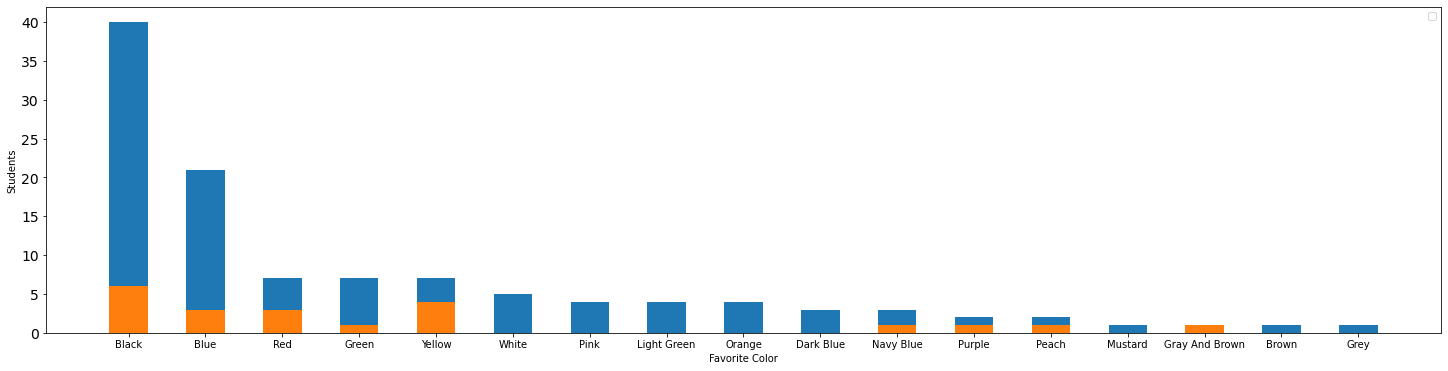

In [166]:
# Plot the favorite colors of male vs female students on a bar chart.
maleStudents = (df[df["Gender"]=="Male"])
femaleStudents= (df[df["Gender"]=="Female"])

maleStudentsColors = list(maleStudents.FavoriteColor.value_counts().index)
maleStudentsColorsCounts = list(maleStudents.FavoriteColor.value_counts().values)

femaleStudentsColors = list(femaleStudents.FavoriteColor.value_counts().index)
femaleStudentsColorsCounts = list(femaleStudents.FavoriteColor.value_counts().values)

plt.figure(figsize = (25,6))
width = 0.5
plt.bar(maleStudentsColors, maleStudentsColorsCounts, width)
plt.bar(femaleStudentsColors, femaleStudentsColorsCounts, width)
plt.xlabel("Favorite Color")
plt.ylabel("Students")
plt.legend()
plt.yticks(fontsize = 14)

plt.show()

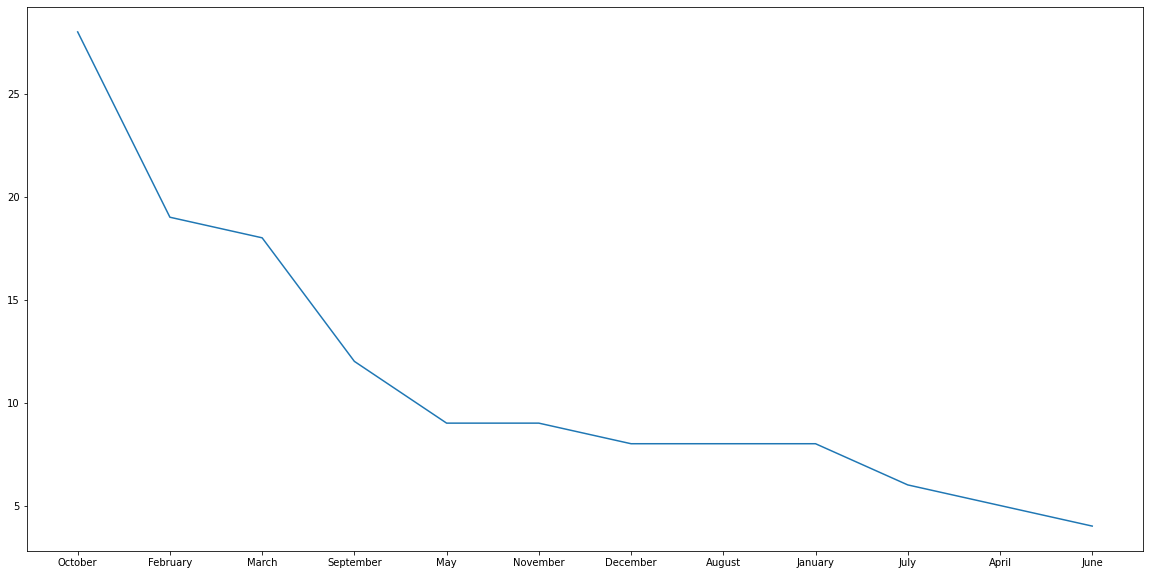

In [168]:
# Plot line chart of students and their birth months.
df.BirthMonth.value_counts()
months = list(df.BirthMonth.value_counts().index)
studentsCount = list(df.BirthMonth.value_counts().values)

plt.figure(figsize = (20,10))
plt.plot(months, studentsCount)
plt.show()
